# Interval Statistic
Interval statistic is library to calculate interval estimations of an average and a variance.

There are several algorithms to estimate an average:

- by known variance
- by unknown variance
- by mena absolute deviation
- by interquartile width

Load Libraries

In [13]:
using IntervalStatistic
using Distributions
using ValidatedNumerics
using Plots
pyplot(reuse=true)
srand(10)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1007524736,1073256705,415953332,1072893275,-601364280,1073193666,-1335760268,1072926448,1521827180,1073499520  …  -439825479,1072978026,-411693740,1073111955,-1611334130,1963385220,236575170,-789052601,382,0]),[1.11258,1.36831,1.34445,1.05665,1.12078,1.17957,1.38181,1.8151,1.24221,1.81978  …  1.65822,1.49011,1.00684,1.42501,1.56311,1.52724,1.45901,1.55851,1.96219,1.38824],382,UInt32[0x0000000a])

In [14]:
to_errors = (i) -> [i.lo i.hi] - mid(i)

function show_result(value, position)
    label = value[2]
    data = value[1]
    println(label, ": ", data)
    scatter!(
        [position], (x) -> mid(data), yerror=to_errors(data), 
        label=label
    )
end

show_result (generic function with 1 method)

Generate samples of normal distribution

In [15]:
d = Normal()
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

0.07504936078705886

[Plots.jl] Initializing backend: pyplot


INFO: Recompiling stale cache file /Users/eoskin/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/eoskin/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/eoskin/.julia/lib/v0.4/PyCall.ji for module PyCall.


known variance: [-0.120948, 0.271046]
inter quartile width: [-0.144696, 0.109761]
unknown variance: [-0.0959839, 0.246083]



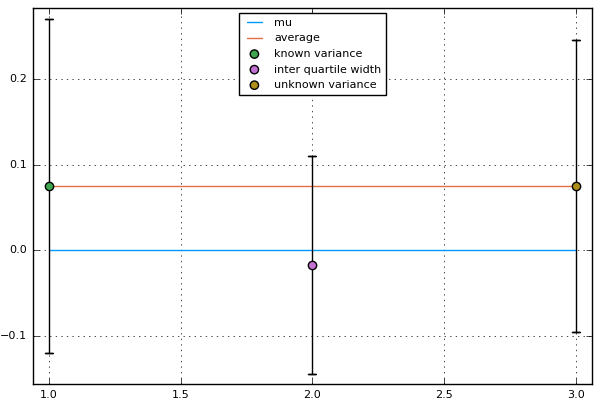

In [16]:
result_by_known_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byKnownVariance(
        confidence_probability, sigma^2
    )),
    "known variance"
]

result_by_inter_quartile_width = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byInterQuartileWidth(
        confidence_probability
    )),
    "inter quartile width"
]

result_by_unknown_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byUnknownVariance(
        confidence_probability
    )),
    "unknown variance"
]


plot([1.0;2.0;3.0], (x) -> mu, label="mu")
plot!([1.0;2.0;3.0], (x) -> average, label="average")

show_result(result_by_known_variance, 1)
show_result(result_by_inter_quartile_width, 2)
show_result(result_by_unknown_variance, 3)

Generate samples of normal distribution with mu=100 sigma=4

In [17]:
d = Normal(100, 4)
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

99.73470493027047

known variance: [98.9507, 100.519]
inter quartile width: [99.3988, 100.533]
unknown variance: [99.004, 100.466]



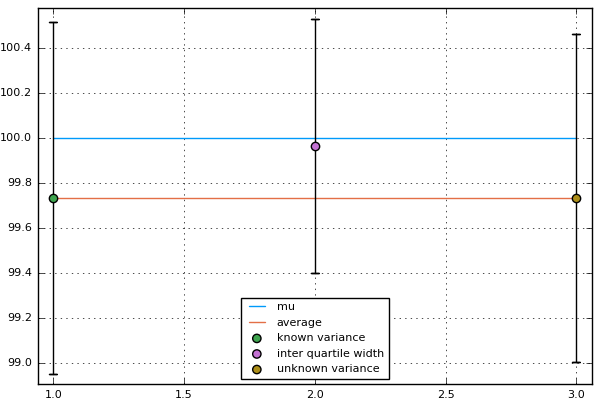

In [19]:
result_by_known_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byKnownVariance(
        confidence_probability, sigma^2
    )),
    "known variance"
]

result_by_inter_quartile_width = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byInterQuartileWidth(
        confidence_probability
    )),
    "inter quartile width"
]

result_by_unknown_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byUnknownVariance(
        confidence_probability
    )),
    "unknown variance"
]


plot([1.0;2.0;3.0], (x) -> mu, label="mu")
plot!([1.0;2.0;3.0], (x) -> average, label="average")

show_result(result_by_known_variance, 1)
show_result(result_by_inter_quartile_width, 2)
show_result(result_by_unknown_variance, 3)